<a href="https://colab.research.google.com/github/Streikus6/TurtlesCoin/blob/master/PD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [8]:
# Load the dataset
file_path = '/content/drive/MyDrive/Verslo Analitika 2025/PD/PD1_duomenys.xlsx'
df = pd.read_excel(file_path)

In [9]:
# Display basic information
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    int64  
 1   Bedroom    156 non-null    int64  
 2   Space      146 non-null    float64
 3   Room       156 non-null    int64  
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 11.1 KB


None

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [13]:
# Select a numerical column for analysis (update based on actual data)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
selected_column = numeric_columns[0]  # Modify if needed

In [14]:
# Calculate min, Q1, median, Q3, max
quartiles = df[selected_column].quantile([0, 0.25, 0.5, 0.75, 1]).to_dict()
print(f"Summary statistics for {selected_column}: {quartiles}")

Summary statistics for Price: {0.0: 32.0, 0.25: 46.0, 0.5: 55.0, 0.75: 65.0, 1.0: 90.0}


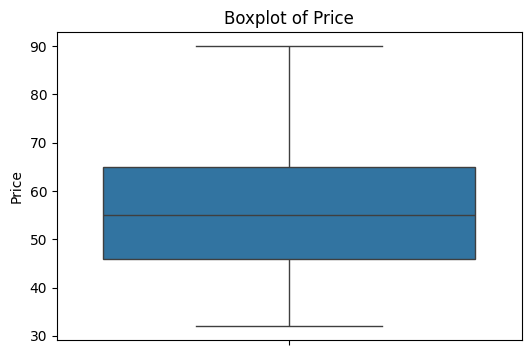

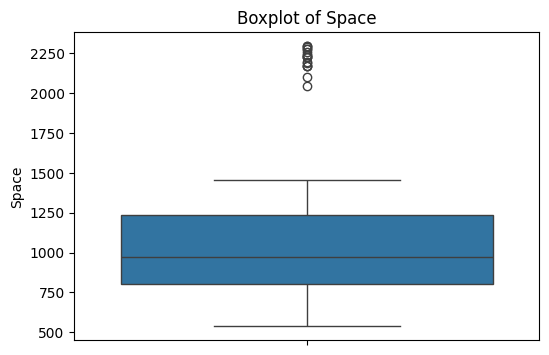

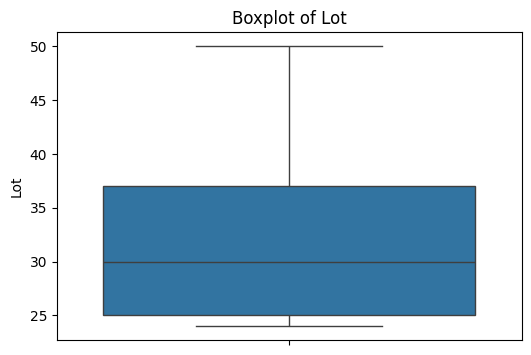

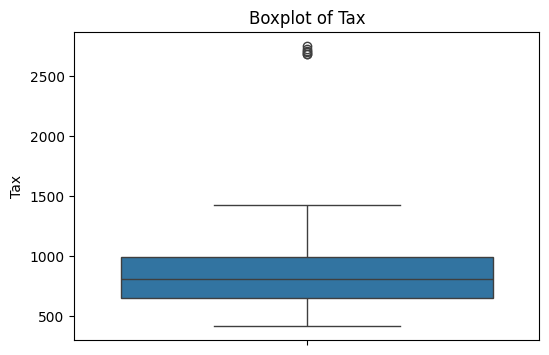

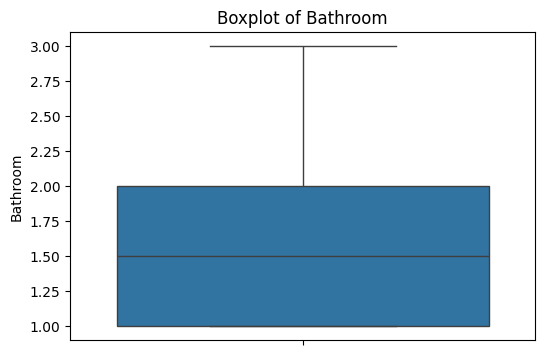

In [19]:
numerical_columns = ['Price', 'Space', 'Lot', 'Tax', 'Bathroom']  # List of columns

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

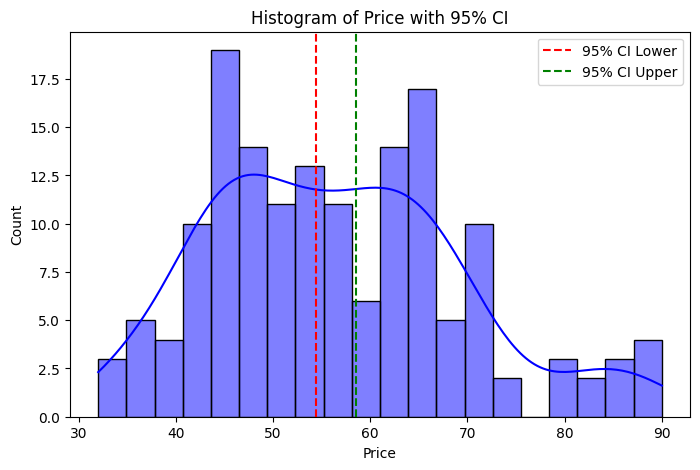

In [16]:
# Histogram with 95% confidence interval
mean, std = df[selected_column].mean(), df[selected_column].std()
conf_interval = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(df)))

plt.figure(figsize=(8, 5))
sns.histplot(df[selected_column], kde=True, bins=20, color='blue')
plt.axvline(conf_interval[0], color='red', linestyle='dashed', label='95% CI Lower')
plt.axvline(conf_interval[1], color='green', linestyle='dashed', label='95% CI Upper')
plt.title(f'Histogram of {selected_column} with 95% CI')
plt.legend()
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Define a function for random forest imputation
def impute_with_rf(df, target_column):
    train_data = df.dropna(subset=[target_column])  # Rows with no missing values in target
    test_data = df[df[target_column].isna()]  # Rows with missing values in target

    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column]
    X_test = test_data.drop(columns=[target_column])

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    df.loc[df[target_column].isna(), target_column] = predictions
    return df

# Apply to columns with missing values
columns_to_impute = ['Space', 'Lot', 'Tax']
for col in columns_to_impute:
    df = impute_with_rf(df, col)

# Display the imputed dataset
display(df.head())

# Verify if all missing values are filled
print("Missing values after imputation:\n", df.isnull().sum())

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53,2,967.0,5,39.0,652.0,1.5,0.0,0
1,55,2,815.0,5,33.0,1000.0,1.0,2.0,1
2,56,3,900.0,5,35.0,897.0,1.5,1.0,0
3,58,3,1007.0,6,24.0,964.0,1.5,2.0,0
4,64,3,1100.0,7,50.0,1099.0,1.5,1.5,0


Missing values after imputation:
 Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64


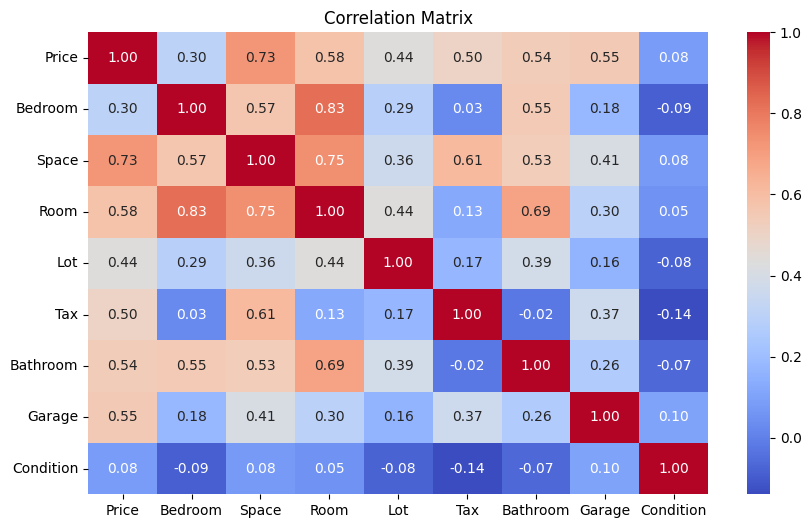

In [18]:
# Correlation matrix (Pearson’s correlation coefficient)
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

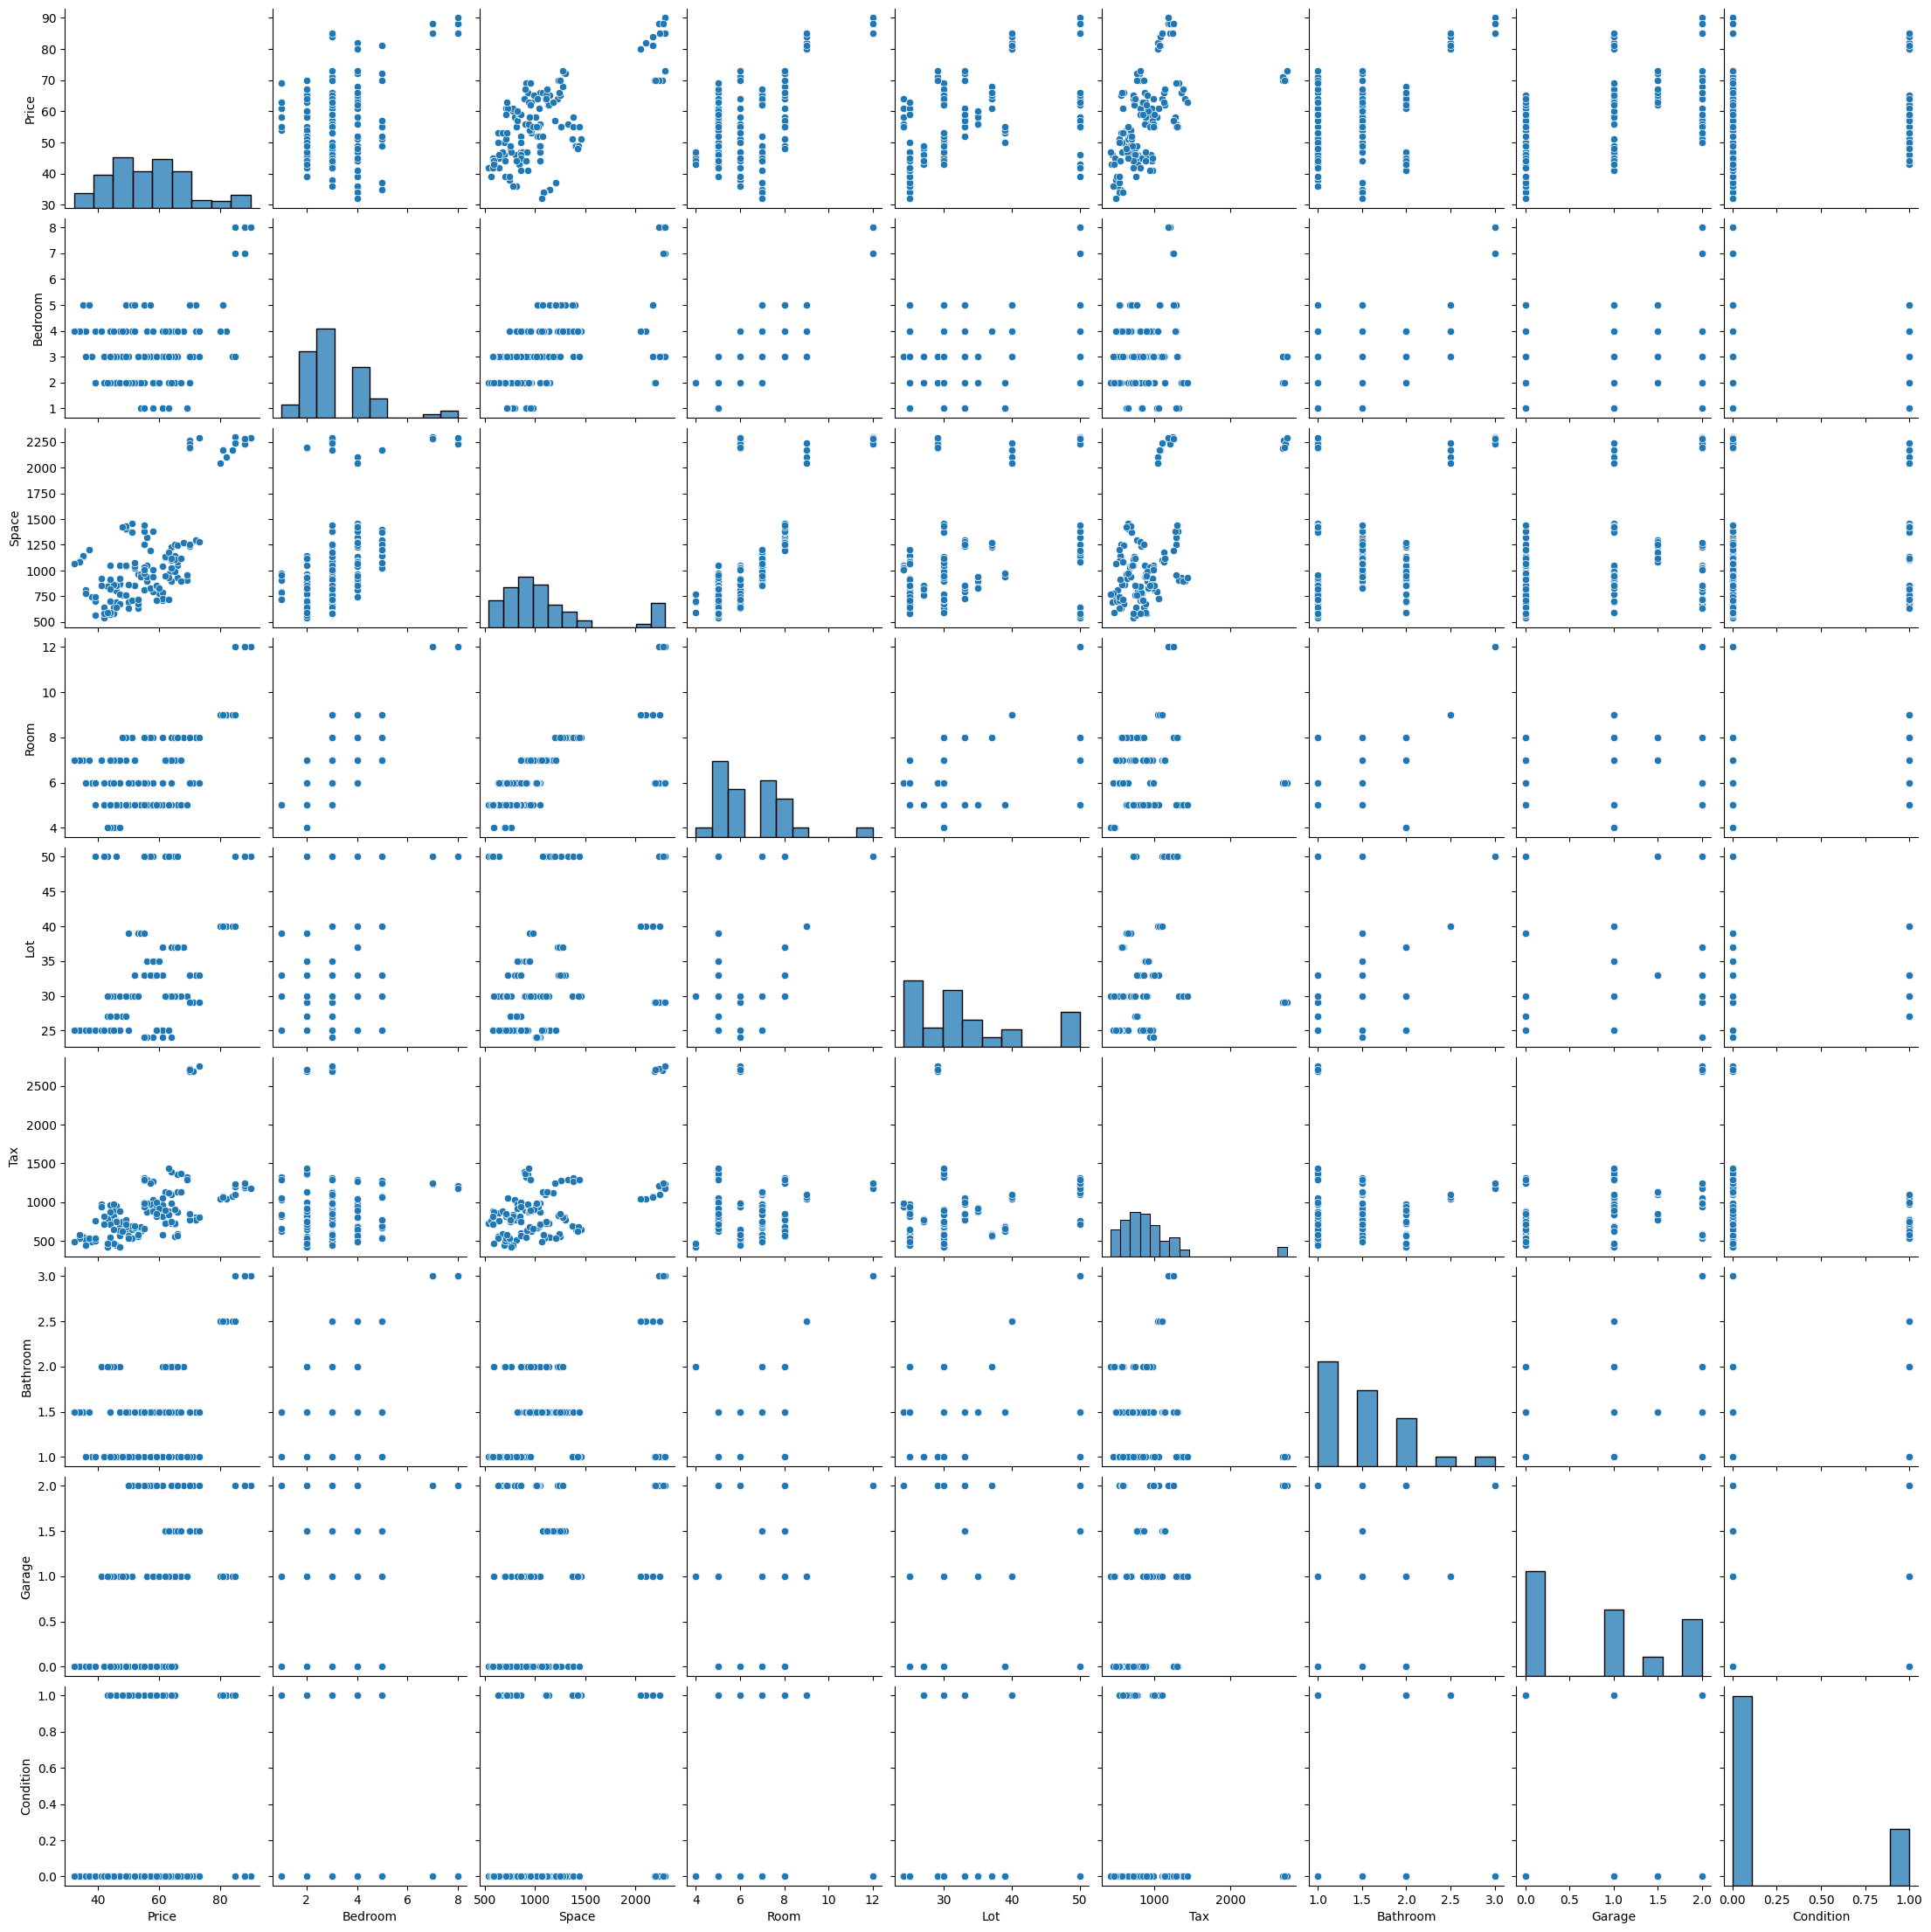

In [ ]:
# Additional visualization: Pairplot for numerical attributes
sns.pairplot(df[numeric_columns])
plt.show()


In [ ]:
# Display cleaned data
display(df.head())

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53,2,967.0,5,39.0,652.0,1.5,0.0,0
1,55,2,815.0,5,33.0,1000.0,1.0,2.0,1
2,56,3,900.0,5,35.0,897.0,1.5,1.0,0
3,58,3,1007.0,6,24.0,964.0,1.5,2.0,0
4,64,3,1100.0,7,50.0,1099.0,1.5,1.5,0
